# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

# **Data Integration**

In [2]:
# Tentukan lokasi folder yang berisi file Excel
folder_path = '/content/drive/MyDrive/SKRIPSI/Data 2024/*.xls'

# Ambil semua file Excel dalam folder
excel_files = glob.glob(folder_path)

# List untuk menampung dataframe
dataframes = []

# Loop melalui setiap file Excel
for file in excel_files:
    # Baca file Excel dan tambahkan ke dalam list dataframe
    df = pd.read_excel(file)

    # Tambahkan ke list jika dataframe tidak kosong
    if not df.empty:
        dataframes.append(df)

# Gabungkan semua dataframe berdasarkan kolom yang sama (baris bertambah)
merged_df = pd.concat(dataframes, axis=0, ignore_index=True)

merged_df

,Invoice Date,Ar Invoice No,OrderDate,Mr No,Name,Birth Date,Address,Payer,Primary Doctor,Admission Type,...,Item Amount,Discount,Is Tax Inclusive,Item Taxable Amount,Tax,Item Net Amount,Total Batch Cost,ProcedureRoom,VisitType,Category
0,2024-01-01 00:16:44.549,OIV2401010001,2023-12-31 22:41:29.400,49575.0,SUMINAH.NY,1968-11-10,-,KARYAWAN YPK,NaN,Rawat Jalan,...,18530.7840,0.0,True,16694.4000,1836.3840,18530.784,13912.0000,NaN,NaN,Obat
1,2024-01-01 00:16:44.549,OIV2401010001,2023-12-31 22:41:29.400,49575.0,SUMINAH.NY,1968-11-10,-,KARYAWAN YPK,NaN,Rawat Jalan,...,10656.0000,0.0,True,9600.0000,1056.0000,10656.000,8000.0000,NaN,NaN,Alat Kesehatan
2,2024-01-01 00:16:44.549,OIV2401010001,2023-12-31 22:41:29.400,49575.0,SUMINAH.NY,1968-11-10,-,KARYAWAN YPK,NaN,Rawat Jalan,...,17582.4000,0.0,True,15840.0000,1742.4000,17582.400,13200.0000,NaN,NaN,Alat Kesehatan
3,2024-01-01 04:06:32.664,EIV2401010001,2024-01-01 04:01:50.393,119839.0,"ANSYE PORRY, NY",1947-08-11,JL KANTIN NO 8,Pribadi,dr.Vebrianty Rantelino,Rawat Darurat,...,20999.9790,0.0,True,18918.9000,2081.0790,20999.979,12285.0000,NaN,NaN,Obat
4,2024-01-01 06:59:36.906,EIV2401010004,2023-12-31 22:10:01.995,90003303.0,"MOHAMAD ZUBIR, TN",1979-01-15,KAV DKI BLOK A 5/13,Pribadi,dr. Danti Meirani,Rawat Darurat,...,10683.0660,0.0,True,9624.3838,1058.6822,10683.066,6249.6000,NaN,NaN,Obat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223094,2024-12-31 23:21:09.221,EIV2412310012,2024-12-31 23:16:13.037,112508.0,MUHAMMAD AERO HARLEY,2022-06-05,KOMPLEK MEDITERANIA CLUSTER AMETHYST KEMBANGAN,Pribadi,dr. Rohedy Adlina Mizani,Rawat Darurat,...,4130.9360,0.0,True,3721.5640,409.3720,0.000,2405.7345,NaN,NaN,Alat Kesehatan
223095,2024-12-31 23:21:09.221,EIV2412310012,2024-12-31 23:16:13.037,112508.0,MUHAMMAD AERO HARLEY,2022-06-05,KOMPLEK MEDITERANIA CLUSTER AMETHYST KEMBANGAN,Pribadi,dr. Rohedy Adlina Mizani,Rawat Darurat,...,38794.8330,0.0,True,34950.3000,3844.5330,0.000,21932.1428,NaN,NaN,Alat Kesehatan
223096,2024-12-31 23:21:09.221,EIV2412310012,2024-12-31 23:15:58.742,112508.0,MUHAMMAD AERO HARLEY,2022-06-05,KOMPLEK MEDITERANIA CLUSTER AMETHYST KEMBANGAN,Pribadi,dr. Rohedy Adlina Mizani,Rawat Darurat,...,20512.8000,0.0,True,18480.0000,2032.8000,20512.800,6913.0000,NaN,NaN,Alat Kesehatan
223097,2024-12-31 23:21:09.221,EIV2412310012,2024-12-31 23:15:25.146,112508.0,MUHAMMAD AERO HARLEY,2022-06-05,KOMPLEK MEDITERANIA CLUSTER AMETHYST KEMBANGAN,Pribadi,dr. Rohedy Adlina Mizani,Rawat Darurat,...,25641.0000,0.0,True,23100.0000,2541.0000,25641.000,2550.0000,NaN,NaN,Alat Kesehatan


# **Data Selection**

In [3]:
# Seleksi kolom yang diinginkan (item, qty, sales price, item amount)
selected_columns = ['Item', 'Qty', 'Purchase Price', 'Sales Price', 'Item Amount', 'Category']
filtered_df = merged_df[selected_columns]

In [4]:
# Menghapus data dengan Category = 'Non Medis'
filtered_df = filtered_df[(filtered_df['Category'] != 'Non Medis')].reset_index(drop=True)

filtered_df

,Item,Qty,Purchase Price,Sales Price,Item Amount,Category
0,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18362.50,18530.7840,18530.7840,Obat
1,SPUIT 10 CC TERUMO,1.0,8040.00,10656.0000,10656.0000,Alat Kesehatan
2,WING NEEDLE 23,1.0,13200.00,17582.4000,17582.4000,Alat Kesehatan
3,LANSOPRAZOL CAPSUL 30 MG,10.0,1228.50,2099.9979,20999.9790,Obat
4,SUMAGESIC TAB,12.0,690.00,890.2555,10683.0660,Obat
...,...,...,...,...,...,...
219690,MICROPORE (3M) 1 INCHI DISPENSE,0.1,24166.00,41309.3604,4130.9360,Alat Kesehatan
219691,HYPAFIX 15CM X 5M,0.1,226950.00,387948.3300,38794.8330,Alat Kesehatan
219692,"NORMAL SALIN 0,9% 500 ML",1.0,14700.00,20512.8000,20512.8000,Alat Kesehatan
219693,KASSA HIDROPHYL PERBUNGKUS,1.0,15000.00,25641.0000,25641.0000,Alat Kesehatan


# **Data Cleaning**

In [5]:
# Cek Informasi Data
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219695 entries, 0 to 219694
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Item            219695 non-null  object 
 1   Qty             219695 non-null  float64
 2   Purchase Price  212938 non-null  float64
 3   Sales Price     219695 non-null  float64
 4   Item Amount     219695 non-null  float64
 5   Category        219695 non-null  object 
dtypes: float64(4), object(2)
memory usage: 10.1+ MB


In [6]:
# Cek Missing Values & Data Duplikat
print("\nMissing Values:")
print(filtered_df.isnull().sum())
print("\nDuplikat Data:", filtered_df.duplicated().sum())


Missing Values:
Item                 0
Qty                  0
Purchase Price    6757
Sales Price          0
Item Amount          0
Category             0
dtype: int64

Duplikat Data: 200060


In [7]:
# Menampilkan baris di mana kolom 'Purchase Price' memiliki nilai null
filtered_df_isnull = filtered_df[filtered_df['Purchase Price'].isnull()]

# Menampilkan hasil
filtered_df_isnull

,Item,Qty,Purchase Price,Sales Price,Item Amount,Category
17,OBAT NON RACIKAN,1.0,NaN,400.0,400.0,Obat
41,OBAT RACIKAN,15.0,NaN,600.0,9000.0,Obat
60,OBAT NON RACIKAN,1.0,NaN,400.0,400.0,Obat
68,RACIKAN,10.0,NaN,0.0,0.0,Obat
79,OBAT NON RACIKAN,1.0,NaN,400.0,400.0,Obat
...,...,...,...,...,...,...
219519,RACIKAN,10.0,NaN,0.0,0.0,Obat
219533,OBAT NON RACIKAN,1.0,NaN,400.0,400.0,Obat
219540,OBAT NON RACIKAN,1.0,NaN,400.0,400.0,Obat
219650,RACIKAN,20.0,NaN,0.0,0.0,Obat


In [8]:
# Menghapus baris yang memiliki nilai null di dataframe
filtered_df = filtered_df.dropna().reset_index(drop=True)

In [9]:
# Cek Missing Values & Data Duplikat setelah dihapus
print("\nMissing Values:")
print(filtered_df.isnull().sum())
print("\nDuplikat Data:", filtered_df.duplicated().sum())


Missing Values:
Item              0
Qty               0
Purchase Price    0
Sales Price       0
Item Amount       0
Category          0
dtype: int64

Duplikat Data: 193396


In [10]:
# Menampilkan baris data duplikat
filtered_df_duplicated = filtered_df[filtered_df.duplicated()]

# Menampilkan hasil
filtered_df_duplicated

,Item,Qty,Purchase Price,Sales Price,Item Amount,Category
22,ULVICE 1000 MG INJ,1.0,31000.00,51282.0000,51282.0000,Obat
25,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18362.50,23781.1728,23781.1728,Obat
27,"NORMAL SALIN 0,9% 25 ML",1.0,7634.00,12427.3380,12427.3380,Alat Kesehatan
44,"NORMAL SALIN 0,9% 25 ML",1.0,7634.00,12427.3380,12427.3380,Alat Kesehatan
53,FLUIMUCIL SYR 75 ML,1.0,64000.00,102564.0000,102564.0000,Obat
...,...,...,...,...,...,...
212933,MICROPORE (3M) 1 INCHI DISPENSE,0.1,24166.00,41309.3604,4130.9360,Alat Kesehatan
212934,HYPAFIX 15CM X 5M,0.1,226950.00,387948.3300,38794.8330,Alat Kesehatan
212935,"NORMAL SALIN 0,9% 500 ML",1.0,14700.00,20512.8000,20512.8000,Alat Kesehatan
212936,KASSA HIDROPHYL PERBUNGKUS,1.0,15000.00,25641.0000,25641.0000,Alat Kesehatan


# **Data Transformation**

## **Grouping Data**

In [11]:
# Melakukan Grouping Data
df_grouped = filtered_df.groupby("Item").agg({
    "Qty": "sum",
    "Purchase Price": "mean",
    "Sales Price": "mean",
    "Item Amount": "sum"
}).reset_index()
df_grouped = df_grouped.merge(filtered_df[["Item", "Category"]].drop_duplicates(), on="Item", how="left")
df_grouped.head()

,Item,Qty,Purchase Price,Sales Price,Item Amount,Category
0,AAV SALEP,3.0,11000.0,5114.559025,11124.9121,Obat
1,ABBOCATH NO.14 ( SURFLO ),4.0,24200.0,125873.792000,312136.4400,Alat Kesehatan
2,ABBOCATH NO.16 GEA,1.0,5000.0,7711.750000,8150.0000,Alat Kesehatan
3,ABBOCATH NO.16 HOSPIRA,4.0,25000.0,39926.370000,159705.4800,Alat Kesehatan
4,ABBOCATH NO.22 (SURFLO),5.0,27000.0,16856.675000,91396.8000,Alat Kesehatan


In [12]:
# Cek info data setelah grouping
print(df_grouped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            1781 non-null   object 
 1   Qty             1781 non-null   float64
 2   Purchase Price  1781 non-null   float64
 3   Sales Price     1781 non-null   float64
 4   Item Amount     1781 non-null   float64
 5   Category        1781 non-null   object 
dtypes: float64(4), object(2)
memory usage: 83.6+ KB
None


In [13]:
# Cek Missing Values & Data Duplikat setelah grouping
print("\nMissing Values:")
print(df_grouped.isnull().sum())
print("\nDuplikat Data:", df_grouped.duplicated().sum())


Missing Values:
Item              0
Qty               0
Purchase Price    0
Sales Price       0
Item Amount       0
Category          0
dtype: int64

Duplikat Data: 0


## **Encoding Kolom Category**

In [14]:
# 5. Encoding Kolom Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Menyimpan kategori asli sebelum encoding
df_grouped['Category_Original'] = df_grouped['Category']

# Melakukan encoding
df_grouped['Category'] = le.fit_transform(df_grouped['Category'])

In [15]:
# Menghitung jumlah item dalam setiap kategori yang telah di-encode
category_counts = df_grouped['Category'].value_counts()

# Mengambil nama kategori sebelum di-encode sesuai index hasil value_counts
category_original_names = le.inverse_transform(category_counts.index)

# Mengubah hasil menjadi DataFrame dengan kategori asli
df_category_counts = pd.DataFrame({
    'Category_Original': category_original_names,
    'Category_Encoded': category_counts.index,
    'Count': category_counts.values
})

# Menampilkan hasil
print(df_category_counts)

  Category_Original  Category_Encoded  Count
0              Obat                 1   1356
1    Alat Kesehatan                 0    425


<Figure size 800x400 with 0 Axes>

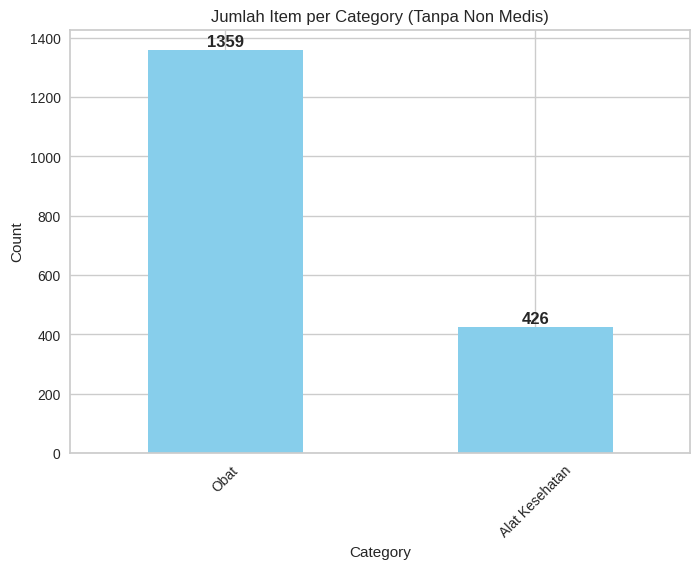

In [16]:
# Data setelah menghapus kategori "Non Medis"
filtered_category_counts = pd.DataFrame({
    'Category': ['Obat', 'Alat Kesehatan'],
    'Count': [1356, 425]
})

# Plot kategori setelah penghapusan "Non Medis"
plt.figure(figsize=(8, 4))
ax = filtered_category_counts.set_index("Category").plot(kind='bar', color='skyblue', legend=False)

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Jumlah Item per Category (Tanpa Non Medis)')
plt.xticks(rotation=45)
plt.show()

## **Normalisasi Data**

In [17]:
# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped[['Qty', 'Purchase Price', 'Sales Price', 'Item Amount', 'Category']])

# Membuat DataFrame baru yang rapi dengan nama kolom yang sesuai
df_scaled = pd.DataFrame(X_scaled, columns=['Qty', 'Purchase Price', 'Sales Price', 'Item Amount', 'Category'])

# Menampilkan dataframe rapi
df_scaled

,Qty,Purchase Price,Sales Price,Item Amount,Category
0,-0.282637,-0.188558,-0.223638,-0.263512,0.559841
1,-0.282236,-0.175738,-0.130894,-0.259451,-1.786222
2,-0.283437,-0.194386,-0.221643,-0.263552,-1.786222
3,-0.282236,-0.174961,-0.196902,-0.261507,-1.786222
4,-0.281836,-0.173019,-0.214620,-0.262429,-1.786222
...,...,...,...,...,...
1776,-0.231393,-0.160393,-0.175140,-0.143088,0.559841
1777,-0.282637,-0.186616,-0.211292,-0.262804,0.559841
1778,-0.275831,-0.190307,-0.215488,-0.259419,0.559841
1779,-0.283037,-0.132324,-0.137112,-0.260484,0.559841


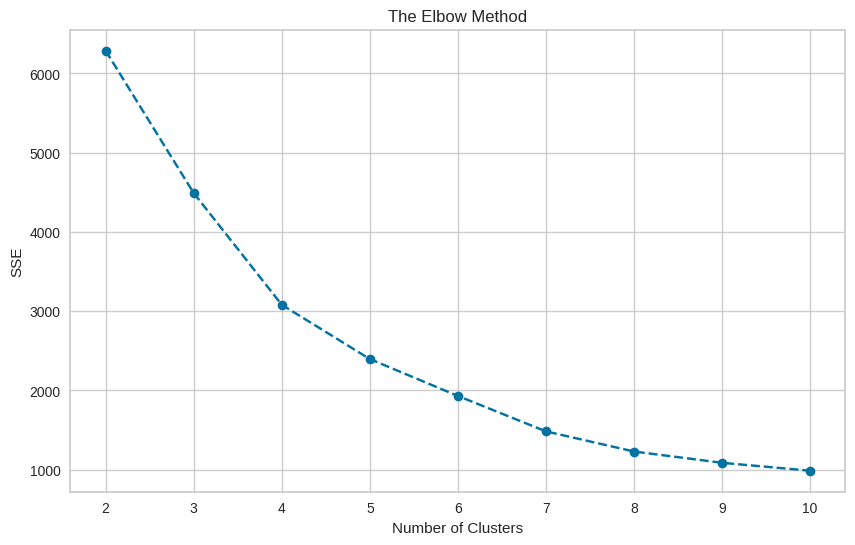

In [18]:
# Elbow Method untuk Menentukan K Optimal
sse = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [19]:
# Selisih penurunan SSE
sse_diff = [sse[i-1] - sse[i] for i in range(1, len(sse))]

for i in range(len(sse_diff)):
  print(f'Jumlah Cluster: {i+3}, SSE Diff: {sse_diff[i]}')

Jumlah Cluster: 3, SSE Diff: 1795.8523346955462
Jumlah Cluster: 4, SSE Diff: 1409.7066234133235
Jumlah Cluster: 5, SSE Diff: 684.7339866367834
Jumlah Cluster: 6, SSE Diff: 465.5338299173043
Jumlah Cluster: 7, SSE Diff: 446.93998768129427
Jumlah Cluster: 8, SSE Diff: 254.18103736099692
Jumlah Cluster: 9, SSE Diff: 142.2767769480099
Jumlah Cluster: 10, SSE Diff: 100.04784445337373


# **K-Means**

In [20]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df_grouped["Cluster"] = kmeans.labels_
print(df_grouped[["Item", "Cluster"]].head())

                        Item  Cluster
0                  AAV SALEP        1
1  ABBOCATH NO.14 ( SURFLO )        0
2         ABBOCATH NO.16 GEA        0
3     ABBOCATH NO.16 HOSPIRA        0
4    ABBOCATH NO.22 (SURFLO)        0


In [21]:
# Menampilkan jumlah item dalam setiap cluster
print("\nJumlah item dalam setiap cluster:")
print(df_grouped["Cluster"].value_counts())


Jumlah item dalam setiap cluster:
Cluster
1    1347
0     417
4       9
3       5
2       3
Name: count, dtype: int64


In [22]:
# Menampilkan rata-rata fitur per cluster
available_features = ["Qty", "Purchase Price", "Sales Price", "Item Amount"]
print("\nRata-rata fitur per cluster:")
print(df_grouped.groupby("Cluster")[available_features].mean())


Rata-rata fitur per cluster:
                  Qty  Purchase Price   Sales Price   Item Amount
Cluster                                                          
0          367.032902    2.953489e+05  4.460396e+05  9.439005e+06
1          638.531893    1.113561e+05  1.717222e+05  1.769995e+07
2         1548.070000    1.670620e+06  2.801795e+06  1.343819e+09
3            5.128000    1.742510e+07  2.038026e+07  1.059545e+08
4        27208.555556    7.207574e+03  1.200515e+04  2.745892e+08


# **Evaluasi Model**

In [23]:
# Evaluasi Model
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    dbi_score = davies_bouldin_score(X_scaled, labels)
    print(f"\nJumlah Cluster: {k}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {dbi_score:.4f}")
    df_grouped[f"Cluster_{k}"] = labels


Jumlah Cluster: 2
Silhouette Score: 0.9276
Davies-Bouldin Index: 0.2886

Jumlah Cluster: 3
Silhouette Score: 0.6755
Davies-Bouldin Index: 0.5127

Jumlah Cluster: 4
Silhouette Score: 0.7076
Davies-Bouldin Index: 0.7896

Jumlah Cluster: 5
Silhouette Score: 0.7041
Davies-Bouldin Index: 0.4885


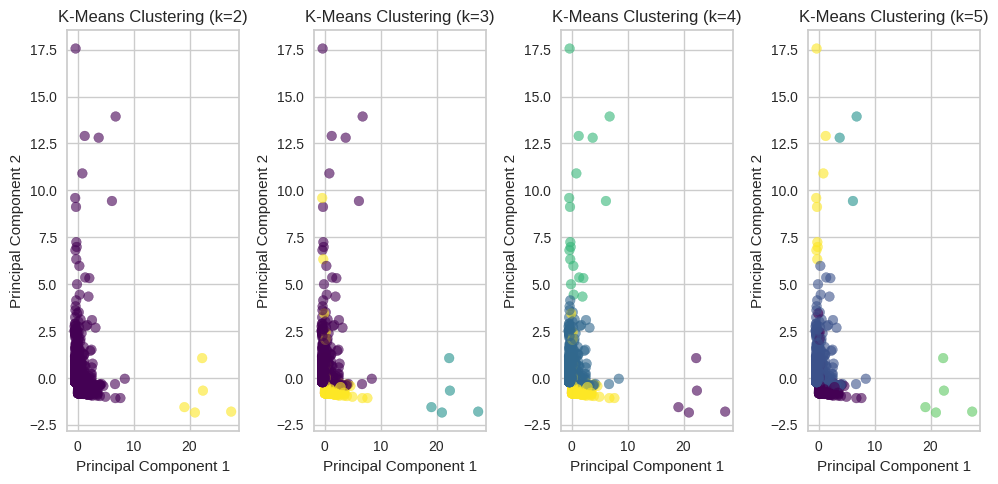

In [24]:
# Visualisasi Hasil Clustering
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))
for i, k in enumerate([2, 3, 4, 5], 1):
    plt.subplot(1, 6, i)
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_grouped[f"Cluster_{k}"], cmap='viridis', alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"K-Means Clustering (k={k})")
plt.tight_layout()
plt.show()

In [25]:
# Hasil Centroid Akhir
print("Last Centroid:")
print(kmeans.cluster_centers_)

Last Centroid:
[[-0.13689839  0.08761136  0.11499551 -0.13633258 -1.78622178]
 [-0.02820542 -0.09108903 -0.09568205 -0.02489506  0.5598409 ]
 [ 0.33592265  1.42332346  1.92423069 17.86402063 -0.22217999]
 [-0.28178483 16.72463719 15.42460309  1.1656305  -1.78622178]
 [10.6089426  -0.19224175 -0.21834574  3.44045797  0.03849364]]


# **Visualisasi**

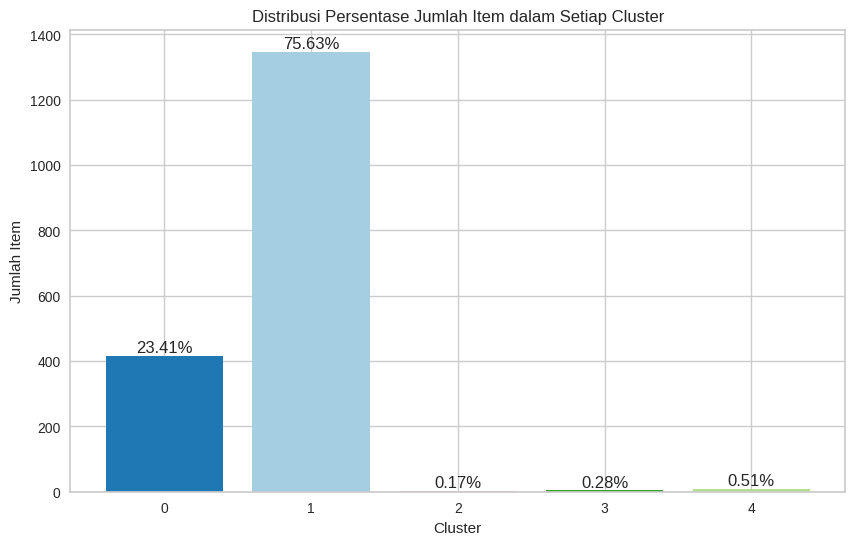

In [26]:
# Menghitung jumlah item per cluster
cluster_counts = df_grouped["Cluster"].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts, color=plt.cm.Paired.colors)

# Menambahkan persentase di atas bar
for bar, count in zip(bars, cluster_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{(count / cluster_counts.sum()) * 100:.2f}%', ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Distribusi Persentase Jumlah Item dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Item')

# Menampilkan plot
plt.show()

In [27]:
# Menampilkan statistik deskriptif per cluster (hanya kolom relevan)
for cluster_num in range(5):
    print(f"Statistik deskriptif untuk Cluster {cluster_num}:")
    # Filter data per cluster
    cluster_data = df_grouped[df_grouped['Cluster'] == cluster_num]

    relevant_columns = ['Qty', 'Purchase Price', 'Sales Price', 'Item Amount', 'Category']
    print(cluster_data[relevant_columns].describe())
    print("\n" + "="*50 + "\n")

Statistik deskriptif untuk Cluster 0:
                Qty  Purchase Price   Sales Price   Item Amount  Category
count    417.000000    4.170000e+02  4.170000e+02  4.170000e+02     417.0
mean     367.032902    2.953489e+05  4.460396e+05  9.439005e+06       0.0
std     1320.752449    6.218461e+05  9.720137e+05  1.690043e+07       0.0
min        0.000000    1.160000e+02  1.659498e+02  0.000000e+00       0.0
25%        3.000000    1.714000e+04  2.285796e+04  3.749000e+05       0.0
50%       12.000000    7.000000e+04  1.015963e+05  1.587646e+06       0.0
75%      123.000000    2.097000e+05  2.983560e+05  1.036213e+07       0.0
max    14690.000000    5.000000e+06  8.150000e+06  9.721120e+07       0.0


Statistik deskriptif untuk Cluster 1:
                Qty  Purchase Price   Sales Price   Item Amount  Category
count   1347.000000    1.347000e+03  1.347000e+03  1.347000e+03    1347.0
mean     638.531893    1.113561e+05  1.717222e+05  1.769995e+07       1.0
std     1486.559658    3.505654e+0

<ipython-input-28-26107a8e8723>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Qty', data=df_grouped, palette="husl")


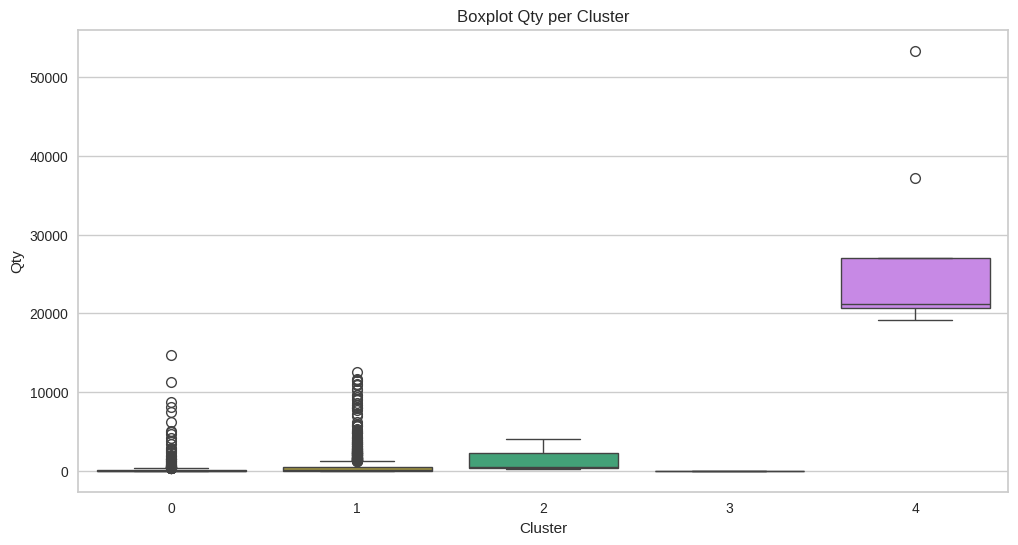

<ipython-input-28-26107a8e8723>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Purchase Price', data=df_grouped, palette="husl")


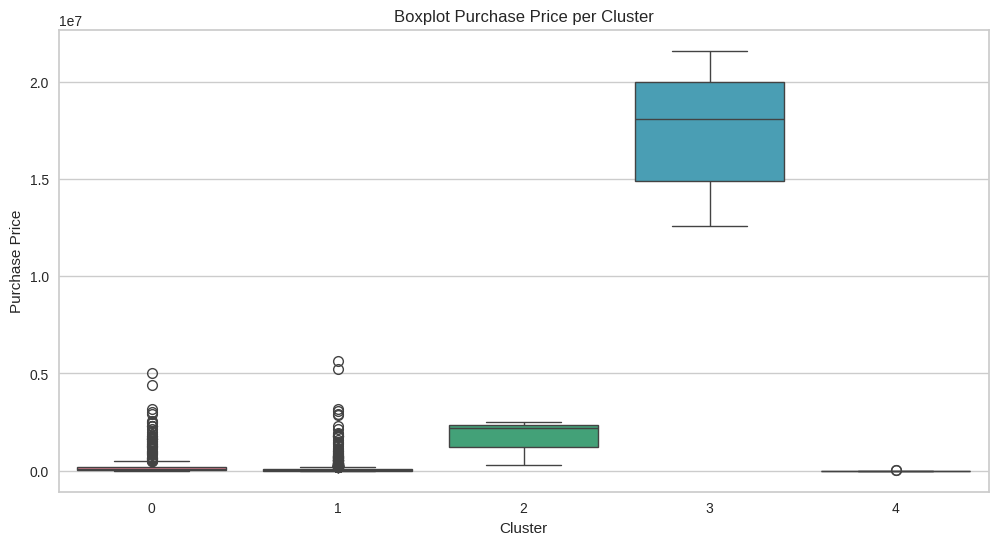

<ipython-input-28-26107a8e8723>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Sales Price', data=df_grouped, palette="husl")


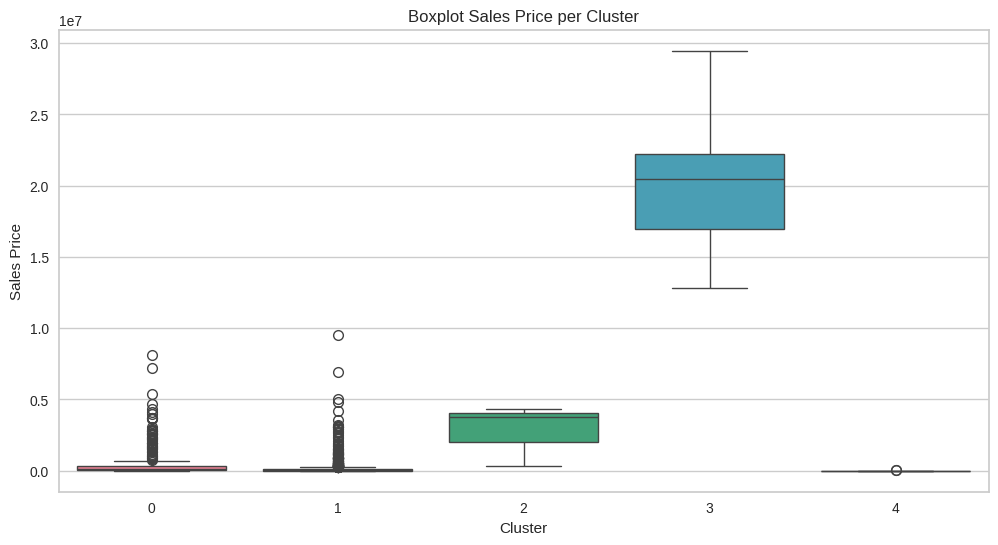

<ipython-input-28-26107a8e8723>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Item Amount', data=df_grouped, palette="husl")


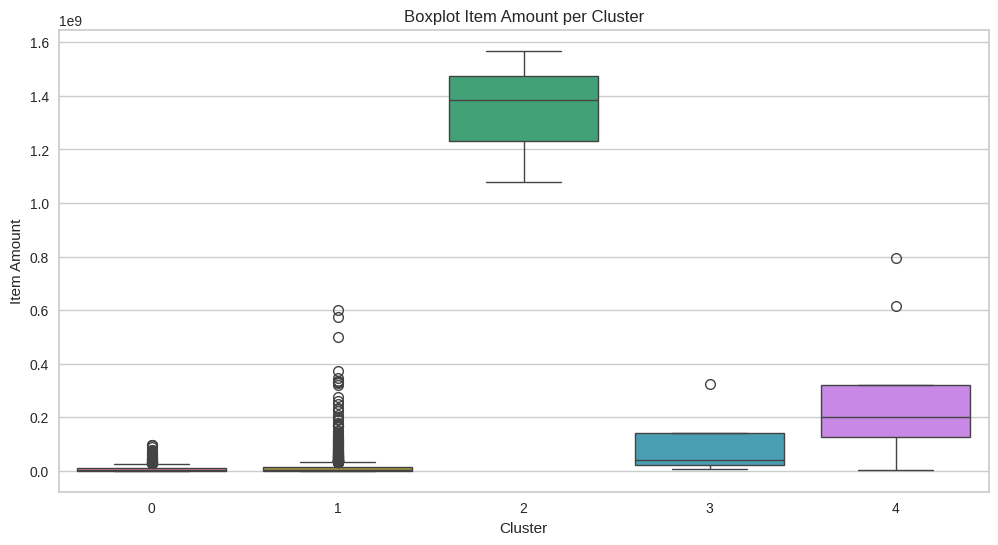

In [28]:
# Boxplot Qty per Cluster dengan warna berbeda per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Qty', data=df_grouped, palette="husl")
plt.title('Boxplot Qty per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Qty')
plt.show()

# Boxplot Purchase Price per Cluster dengan warna berbeda per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Purchase Price', data=df_grouped, palette="husl")
plt.title('Boxplot Purchase Price per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Price')
plt.show()

# Boxplot Sales Price per Cluster dengan warna berbeda per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Sales Price', data=df_grouped, palette="husl")
plt.title('Boxplot Sales Price per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales Price')
plt.show()

# Boxplot Item Amount per Cluster dengan warna berbeda per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Item Amount', data=df_grouped, palette="husl")
plt.title('Boxplot Item Amount per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Item Amount')
plt.show()

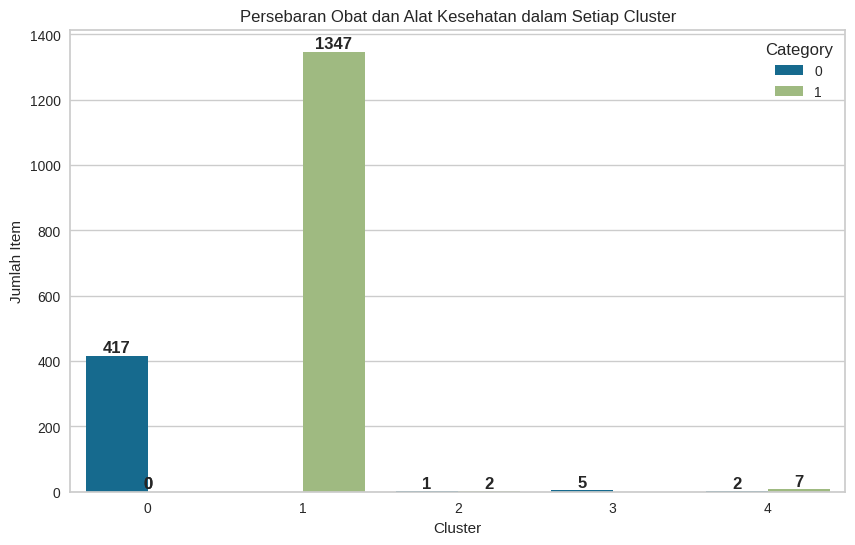

In [29]:
# Visualisasi Persebaran Kategori dalam Tiap Cluster dengan Angka di Atas Bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Cluster', hue='Category', data=df_grouped)
plt.title('Persebaran Obat dan Alat Kesehatan dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Item')
plt.legend(title='Category')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Menampilkan plot
plt.show()

In [30]:
# Menampilkan DataFrame untuk Masing-Masing Cluster
clusters = df_grouped['Cluster'].unique()
clustered_dfs = {cluster: df_grouped[df_grouped['Cluster'] == cluster] for cluster in clusters}

# Daftar kolom yang ingin dihapus
columns_to_drop = ['Cluster', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']

clusters = df_grouped['Cluster'].unique()
clustered_dfs = {
    cluster: df_grouped[df_grouped['Cluster'] == cluster].drop(columns=columns_to_drop)
    for cluster in clusters
}

# Menampilkan tabel untuk masing-masing cluster
for cluster, df_cluster in clustered_dfs.items():
    print(f"\nData untuk Cluster {cluster}:")
    display(df_cluster)


Data untuk Cluster 1:


,Item,Qty,Purchase Price,Sales Price,Item Amount,Category,Category_Original
0,AAV SALEP,3.0,11000.0,5114.559025,1.112491e+04,1,Obat
6,ABBOTIC SYR 125MG/5ML 60ML,7.0,227000.0,294469.351429,2.061285e+06,1,Obat
7,ABBOTIC SYR 250MG/5ML 50ML,10.0,334700.0,373141.762500,3.781373e+06,1,Obat
8,ACARBOSE 50 MG TAB,150.0,1200.0,1598.400000,2.397600e+05,1,Obat
9,ACARBOSE 50 MG TAB ( 30 TAB/BOX ) IMC,790.0,1232.0,1633.204376,1.283116e+06,1,Obat
...,...,...,...,...,...,...,...
1776,ZITROLIN ( 6 TAB/BOX ),131.0,40000.0,68262.571429,8.938200e+06,1,Obat
1777,ZOLMIA TAB,3.0,13000.0,21190.000000,6.357000e+04,1,Obat
1778,ZOLTA 10 MG,20.0,9200.0,15726.480000,3.145296e+05,1,Obat
1779,ZOTER CREAM 5 GR,2.0,68900.0,117777.660000,2.355553e+05,1,Obat



Data untuk Cluster 0:


,Item,Qty,Purchase Price,Sales Price,Item Amount,Category,Category_Original
1,ABBOCATH NO.14 ( SURFLO ),4.0,2.420000e+04,1.258738e+05,3.121364e+05,0,Alat Kesehatan
2,ABBOCATH NO.16 GEA,1.0,5.000000e+03,7.711750e+03,8.150000e+03,0,Alat Kesehatan
3,ABBOCATH NO.16 HOSPIRA,4.0,2.500000e+04,3.992637e+04,1.597055e+05,0,Alat Kesehatan
4,ABBOCATH NO.22 (SURFLO),5.0,2.700000e+04,1.685667e+04,9.139680e+04,0,Alat Kesehatan
5,ABBOCATH NO.24 (SURFLO),228.0,3.100000e+04,3.493395e+04,8.035988e+06,0,Alat Kesehatan
...,...,...,...,...,...,...,...
1710,VICRYL PLUS 1 REVERSE CUTTING VCP486 (ETHICON),1.0,1.103000e+05,1.323600e+05,1.323600e+05,0,Alat Kesehatan
1753,WATER PULSE,42.0,9.000000e+04,1.506137e+05,6.309612e+06,0,Alat Kesehatan
1754,WING NEEDLE 23,435.0,1.408525e+04,2.165452e+04,9.414604e+06,0,Alat Kesehatan
1755,WORD BARTHOLIN GLAND CATHETER,1.0,1.276000e+06,1.531200e+06,1.531200e+06,0,Alat Kesehatan



Data untuk Cluster 4:


,Item,Qty,Purchase Price,Sales Price,Item Amount,Category,Category_Original
220,CAL-95,19188.0,6500.00,10687.499631,2.055767e+08,1,Obat
461,DUPHASTON 10 MG,19889.0,19095.00,30758.091528,6.167539e+08,1,Obat
602,FORCE D 5000 IU,53385.0,3500.00,6013.128697,3.204854e+08,1,Obat
603,FORCE D 5000 IU ( 50 CAP/DUS ),21130.0,3500.00,6005.583026,1.267185e+08,1,Obat
606,FORMICAL-B,26980.0,4400.00,7446.644726,2.012547e+08,1,Obat
687,HEXISWAB,25187.0,320.00,522.917852,1.299670e+07,0,Alat Kesehatan
843,KERTAS PUYER,37223.0,53.17,86.838362,3.236274e+06,0,Alat Kesehatan
1036,MICROGEST 200 MG,21244.0,22000.00,37391.277034,7.954052e+08,1,Obat
1328,PROLACTA FOR MOTHER,20651.0,5500.00,9134.394994,1.888753e+08,1,Obat



Data untuk Cluster 2:


,Item,Qty,Purchase Price,Sales Price,Item Amount,Category,Category_Original
443,DIVITI PREFILLED SYRINGE 2.5MG/0.5ML,3975.00,295000.0,3.502419e+05,1.383010e+09,0,Alat Kesehatan
657,GONAL F PEN 300 IU/0.5ML,419.47,2187911.0,3.737263e+06,1.568824e+09,1,Obat
1256,PERGOVERIS PEN 300/150 IU,249.74,2528948.0,4.317880e+06,1.079622e+09,1,Obat



Data untuk Cluster 3:


,Item,Qty,Purchase Price,Sales Price,Item Amount,Category,Category_Original
672,HARMONIC ACE 36CM(JHAR36),1.00,12568500.0,2.048666e+07,20486655.0,0,Alat Kesehatan
936,LIGASURE BLUNT TIP,1.32,18078000.0,2.946714e+07,38896624.8,0,Alat Kesehatan
937,LIGASURE IMPACT ( LF4418 ),8.17,19980000.0,1.694135e+07,139829550.0,0,Alat Kesehatan
938,LIGASURE MARYLAND JAW REFF LF1937,14.52,14910000.0,2.221064e+07,322498552.2,0,Alat Kesehatan
939,"LIGASURE SMALL JAW,OPEN SEALER /DIVIDER 16.5MM...",0.63,21589000.0,1.279550e+07,8061165.0,0,Alat Kesehatan
